In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
prefix_species="18HRS"
species="18HRS"
## heatmap threshold
high=4
low=-4

#Set font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = "Arial"
#Make pdf editable for illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
#1.0 Import whole transcript list
path_gene_list="Docs/gene_list_sorted_whole.csv"
df_matrix = pd.read_csv(path_gene_list, header=None, names=["Gene"])
#gene_name_list = gene_name.values.tolist()
#gene_name_list.sort()
#print(gene_name_list)
for filepath in glob.glob('DE_results/'+species+'*_results_rm.csv'):
    #df_merge=pd.DataFrame(columns=["Geneid"])
    prefix = os.path.basename(filepath).split('.')[0]
    stats_df = pd.read_csv(filepath, header=0, index_col=0)
    stats_exp_df = stats_df.iloc[:, 0:3]
    stats_exp_df.drop(columns=['baseMean'], inplace=True)
    index_num = prefix.split('_DEseq')[0]
    column_name=index_num
    #print(column_name)
    stats_exp_df.columns = ["Gene", column_name]
    df_matrix = df_matrix.merge(stats_exp_df, on='Gene', how='outer')
#1.2 Fill na with 0
df_matrix = df_matrix.set_index('Gene')
##rename some microbe names
df_matrix = df_matrix.rename(columns = {species+"-TUGFP__29": species+"-STAPHYLOCOCCUS_EPIDERMIDIS__29"})
df_matrix = df_matrix.rename(columns = {species+"-KOCURIA_KRISTINAE__10": species+"-ROTHIA_KRISTINAE__10"})
df_matrix_OK = df_matrix.fillna(0)
df_matrix_OK.sort_index(axis=1, inplace=True)
path_df_matrix_OK = "stats/"+"H2O_"+prefix_species+"_rm_exp_matrix_OK.csv"
df_matrix_OK.to_csv(path_df_matrix_OK, sep=",")

In [3]:
#1.3 Add significant matrix
## Import whole transcript list
gene_name_list = df_matrix_OK.index.tolist()
##
df_matrix_sig = pd.DataFrame()
df_matrix_sig_up = pd.DataFrame()
df_matrix_sig_down = pd.DataFrame()
for filepath in glob.glob('DE_results/'+species+'*_down_genes_rm.txt'):
    #df_merge=pd.DataFrame(columns=["Geneid"])
    prefix0 = os.path.basename(filepath).split('.')[0]
    prefix1 = prefix0.split('_down_genes_rm')[0]
    index_num = prefix1
    column_name=index_num
    #print(column_name)
    path_up="DE_results/"+prefix1+"_up_genes_rm.txt"
    path_down="DE_results/"+prefix1+"_down_genes_rm.txt"
    up_list_name = column_name+"_up_genes"
    down_list_name = column_name+"_down_genes"
    stats_up = pd.read_csv(path_up, header=None, names=[up_list_name])
    stats_down = pd.read_csv(path_down, header=None, names=[down_list_name])
    stats_up_list = stats_up.values.tolist()
    stats_down_list = stats_down.values.tolist()
    stats_up_list.sort()
    stats_down_list.sort()
    # Create 1&0&-1 matrix for single cluster
    matrix_col_list = [0] * len(gene_name_list)
    matrix_col_list_up = [0] * len(gene_name_list)
    matrix_col_list_down = [0] * len(gene_name_list)
    ## Transfer list-list to ilist
    stats_up_list_r = []
    for i in stats_up_list:
        stats_up_list_r.append(i[0])
    stats_down_list_r = []
    ## Search index in whole gene list
    for i in stats_down_list:
        stats_down_list_r.append(i[0])
    for i in stats_up_list_r:
        if i in gene_name_list:
            ind = gene_name_list.index(i)
            #print(ind)
            matrix_col_list[ind] = 1
            matrix_col_list_up[ind] = 1
    for i in stats_down_list_r:
        if i in gene_name_list:
            ind = gene_name_list.index(i)
            #print(ind)
            matrix_col_list[ind] = -1
            matrix_col_list_down[ind] = -1
    #print(sum(matrix_col_list))
    col_name = column_name
    df_matrix_sig[col_name] = matrix_col_list
    df_matrix_sig_up[col_name] = matrix_col_list_up
    df_matrix_sig_down[col_name] = matrix_col_list_down
##Save to csv -- whole
df_matrix_sig.index = gene_name_list
df_matrix_sig = df_matrix_sig.rename(columns = {species+"-TUGFP__29": species+"-STAPHYLOCOCCUS_EPIDERMIDIS__29"})
df_matrix_sig = df_matrix_sig.rename(columns = {species+"-KOCURIA_KRISTINAE__10": species+"-ROTHIA_KRISTINAE__10"})
df_matrix_sig.sort_index(axis=1, inplace=True)
path_df_matrix_sig = "stats/"+"H2O_"+prefix_species+"_rm_exp_matrix_sig.csv"
df_matrix_sig.to_csv(path_df_matrix_sig, sep=",")
##Save to csv -- up
df_matrix_sig_up.index = gene_name_list
df_matrix_sig_up = df_matrix_sig_up.rename(columns = {species+"-TUGFP__29": species+"-STAPHYLOCOCCUS_EPIDERMIDIS__29"})
df_matrix_sig_up = df_matrix_sig_up.rename(columns = {species+"-KOCURIA_KRISTINAE__10": species+"-ROTHIA_KRISTINAE__10"})
df_matrix_sig_up.sort_index(axis=1, inplace=True)
path_df_matrix_sig_up = "stats/"+"H2O_"+prefix_species+"_rm_exp_matrix_sig_up.csv"
df_matrix_sig_up.to_csv(path_df_matrix_sig_up, sep=",")
##Save to csv -- down
df_matrix_sig_down.index = gene_name_list
df_matrix_sig_down = df_matrix_sig_down.rename(columns = {species+"-TUGFP__29": species+"-STAPHYLOCOCCUS_EPIDERMIDIS__29"})
df_matrix_sig_down = df_matrix_sig_down.rename(columns = {species+"-KOCURIA_KRISTINAE__10": species+"-ROTHIA_KRISTINAE__10"})
df_matrix_sig_down.sort_index(axis=1, inplace=True)
path_df_matrix_sig_down = "stats/"+"H2O_"+prefix_species+"_rm_exp_matrix_sig_down.csv"
df_matrix_sig_down.to_csv(path_df_matrix_sig_down, sep=",")

In [4]:
#2. Topic analysis -- interferon stimulated genes refined
#2.1 Topic
topic = "interferon_stimulated_genes_refined"
#2.1.1 Read in from .csv
path_list="Docs/Targeted_analyses_"+topic+".csv"
topic_df = pd.read_csv(path_list, header=0, index_col=0)
topic_col_list = topic_df.iloc[:,0].tolist()
#2.1.2 Get topic and topic significant matrix
df_topic = df_matrix_OK.loc[topic_col_list]
path_df = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+".csv"
df_topic.to_csv(path_df, sep=",")
df_topic_sig = df_matrix_sig.loc[topic_col_list]
path_df = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_sig.csv"
df_topic_sig.to_csv(path_df, sep=",")
#2.1.3 Get topic nz and topic nz significant matrix
df_topic_nz = df_topic.loc[(df_topic != 0).all(axis=1)]
path_df = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_nz.csv"
df_topic_nz.to_csv(path_df, sep=",")
df_topic_nz_sig = df_matrix_sig.loc[df_topic_nz.index.values.tolist()]
path_df = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_nz_sig.csv"
df_topic_nz_sig.to_csv(path_df, sep=",")

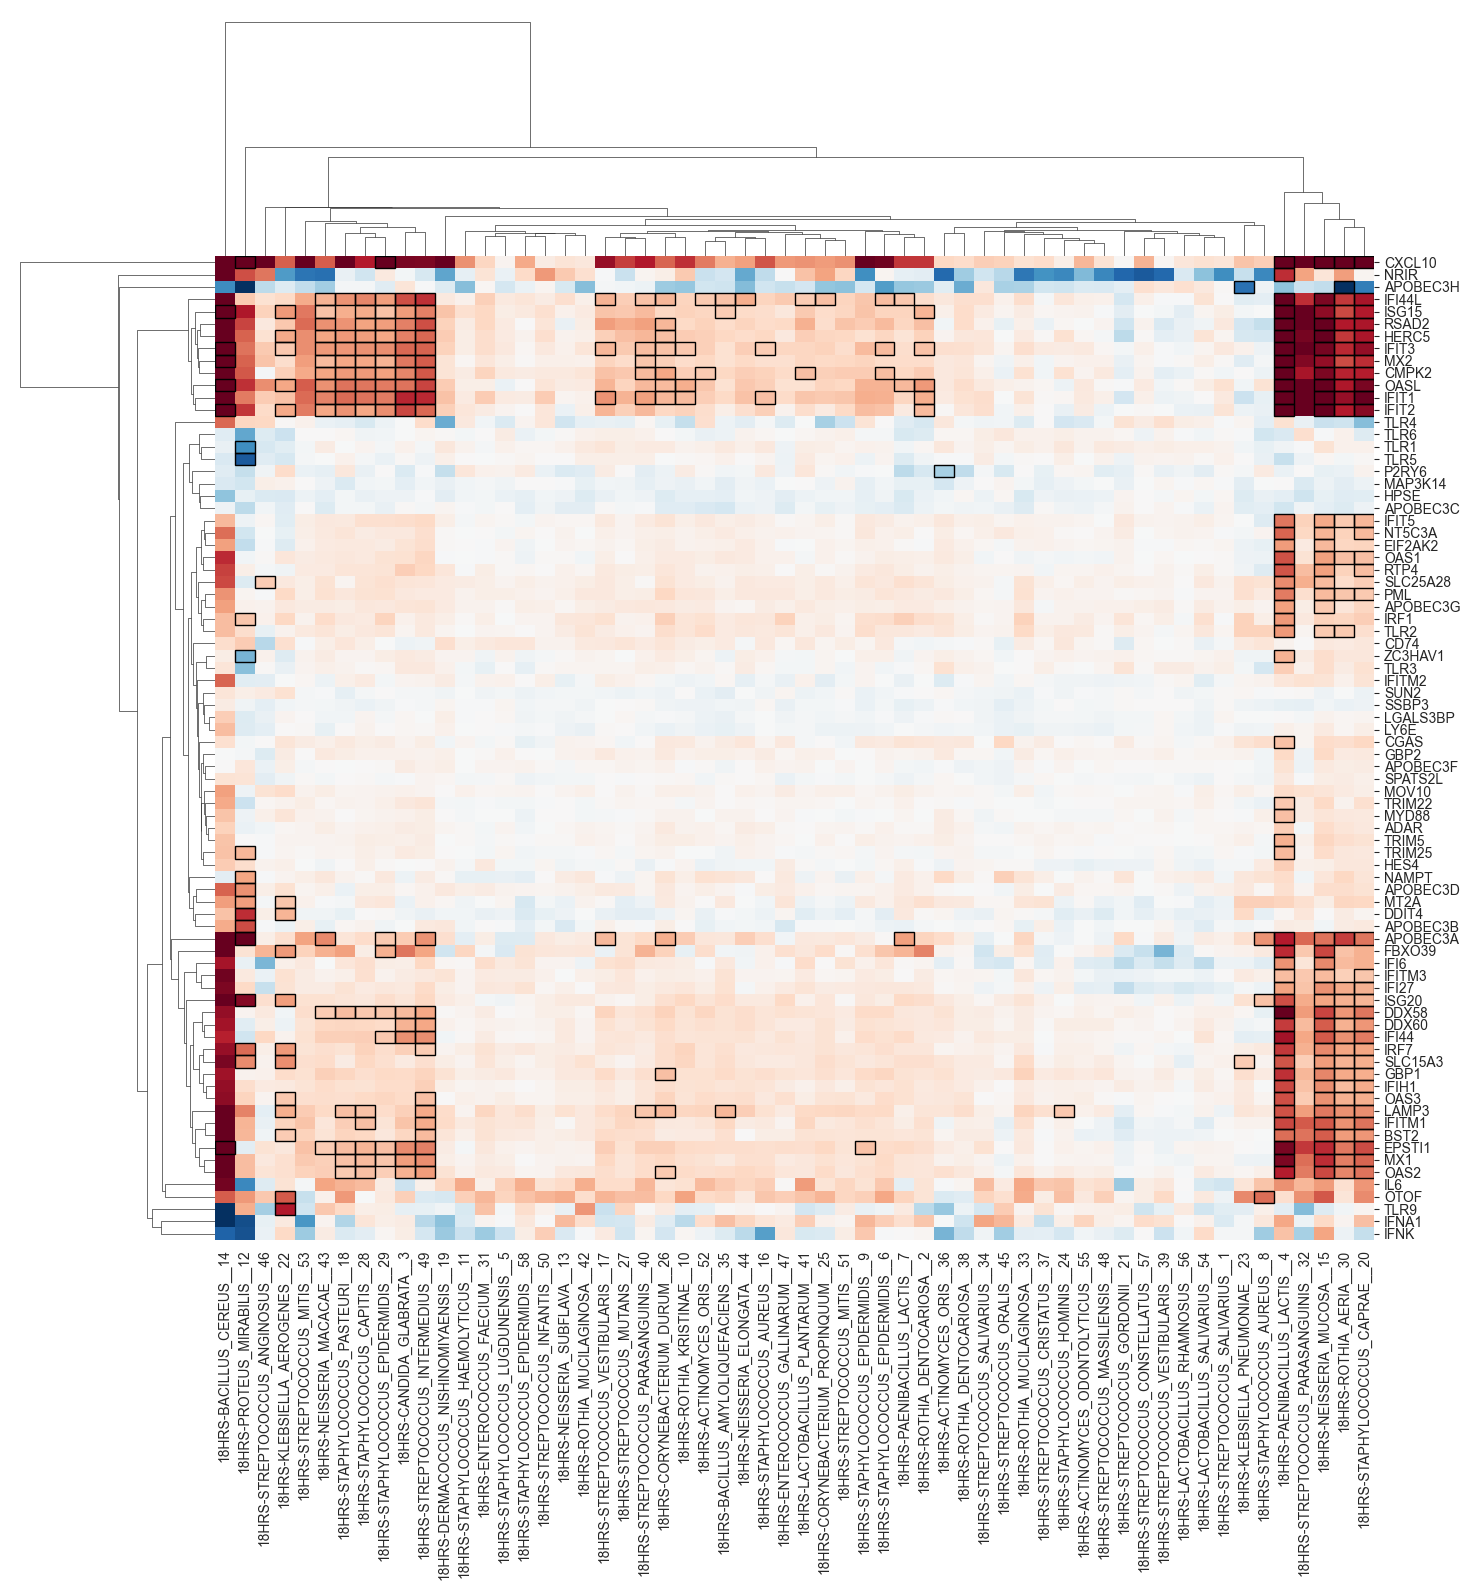

In [5]:
#2.2 Filtering nz genes
## Clustermap adding significance
df = df_topic_nz.copy() ## Could use df_topic_OK_filtered_r instead
df_sig = df_topic_nz_sig.copy() ## Could use df_topic_OK_filtered_sig_r instead
sns.set_context()
sns.set_style("dark")
fig_clu_sig = sns.clustermap(df,
    cmap="RdBu_r",
    dendrogram_ratio=(.15, .20),
    #cbar=False,
    vmin=low,
    vmax=high,
    figsize=(15,16),
    yticklabels=1,
    xticklabels=1,
    row_cluster=True,
    )
ax = fig_clu_sig.ax_heatmap
ax.set_ylabel("")
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
##Add DEG boxes
from matplotlib.patches import Rectangle
###Get clustered lists
clustered_xlabels = ax.get_xticklabels()
clustered_xlist = [str(i).split(" '")[1][:-2] for i in clustered_xlabels]
clustered_ylabels = ax.get_yticklabels()
clustered_ylist = [str(i).split(" '")[1][:-2] for i in clustered_ylabels]
###Draw on clustermap
df_sig_clu = df_sig[clustered_xlist]
for x in clustered_xlist:
    index=0
    index_x=clustered_xlist.index(x)
    for y in clustered_ylist:
        index_y=clustered_ylist.index(y)
        if df_sig.loc[y,x] == 1:
            ax.add_patch(Rectangle((index_x, index_y), 1, 1, fill=False, edgecolor='black', lw=1))
        elif df_sig.loc[y,x] == -1:
            ax.add_patch(Rectangle((index_x, index_y), 1, 1, fill=False, edgecolor='black', lw=1))
fig_clu_sig.cax.set_visible(False)
#fig_path = "exp_figures_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_filtered_clustered_significance.pdf"
#fig_clu_sig.savefig(fig_path, bbox_inches="tight")

In [6]:
#2.3 Filtering responsive genes
## Filtering responsive genes
clustered_ylistr = [clustered_ylist[0]] + clustered_ylist[3:13] + clustered_ylist[55:76]
df_topic_nzr = df_topic_nz.loc[clustered_ylistr]
df_topic_nzr_sig = df_topic_nz_sig.loc[clustered_ylistr]
gene_sum = df_topic_nzr.sum(axis=1)
gene_sum.sort_values(ascending=False, inplace=True)
gene_sum_list = gene_sum.index.to_list()
df_topic_nzr2 = df_topic_nzr.loc[gene_sum.index.to_list()]
df_topic_nzr2_sig = df_topic_nzr_sig.loc[gene_sum.index.to_list()]
##save to csv
path_df = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_nzr2.csv"
df_topic_nzr2.to_csv(path_df, sep=",")
path_df = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_nzr2_sig.csv"
df_topic_nzr2_sig.to_csv(path_df, sep=",")

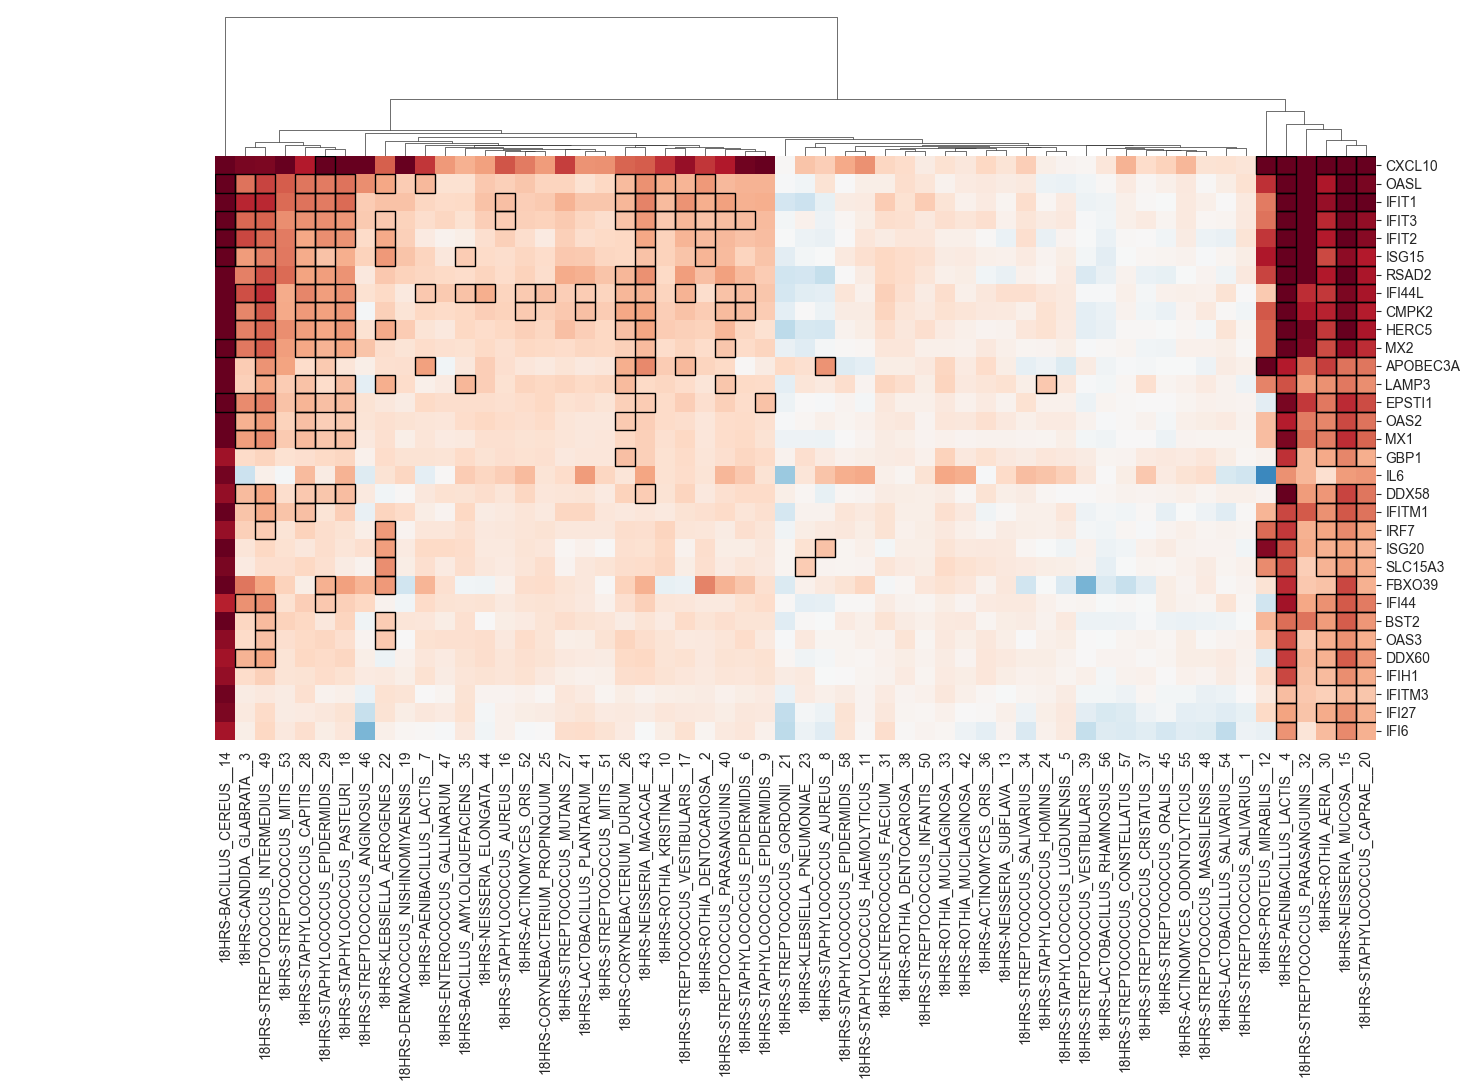

In [7]:
## Filtered clustermap add significance -- refined
df = df_topic_nzr2.copy() ## Could use df_topic_OK_filtered_r instead
df_sig = df_topic_nzr2_sig.copy() ## Could use df_topic_OK_filtered_sig_r instead
sns.set_context()
sns.set_style("dark")
fig_clu_sig = sns.clustermap(df,
    cmap="RdBu_r",
    dendrogram_ratio=(.15, .20),
    #cbar=False,
    vmin=low,
    vmax=high,
    figsize=(15,11),
    yticklabels=1,
    xticklabels=1,
    row_cluster=False,
    )
ax = fig_clu_sig.ax_heatmap
ax.set_ylabel("")
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
##Add DEG boxes
from matplotlib.patches import Rectangle
###Get clustered lists
clustered_xlabels = ax.get_xticklabels()
clustered_xlist = [str(i).split(" '")[1][:-2] for i in clustered_xlabels]
clustered_ylabels = ax.get_yticklabels()
clustered_ylist = [str(i).split(" '")[1][:-2] for i in clustered_ylabels]
###Draw on clustermap
df_sig_clu = df_sig[clustered_xlist]
for x in clustered_xlist:
    index=0
    index_x=clustered_xlist.index(x)
    for y in clustered_ylist:
        index_y=clustered_ylist.index(y)
        if df_sig.loc[y,x] == 1:
            ax.add_patch(Rectangle((index_x, index_y), 1, 1, fill=False, edgecolor='black', lw=1))
        elif df_sig.loc[y,x] == -1:
            ax.add_patch(Rectangle((index_x, index_y), 1, 1, fill=False, edgecolor='black', lw=1))
fig_clu_sig.cax.set_visible(False)
#fig_path = "exp_figures_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_filtered_clustered_significance_refined.pdf"
#fig_clu_sig.savefig(fig_path, bbox_inches="tight")

In [8]:
#2.4 Adding ISG score
## Calculating ISG score
median_topic_microbe = df_topic_nzr2.median(axis=0)
median_topic_microber = median_topic_microbe.reindex(clustered_xlist)
df_median = median_topic_microber.to_frame(name="ISG score")

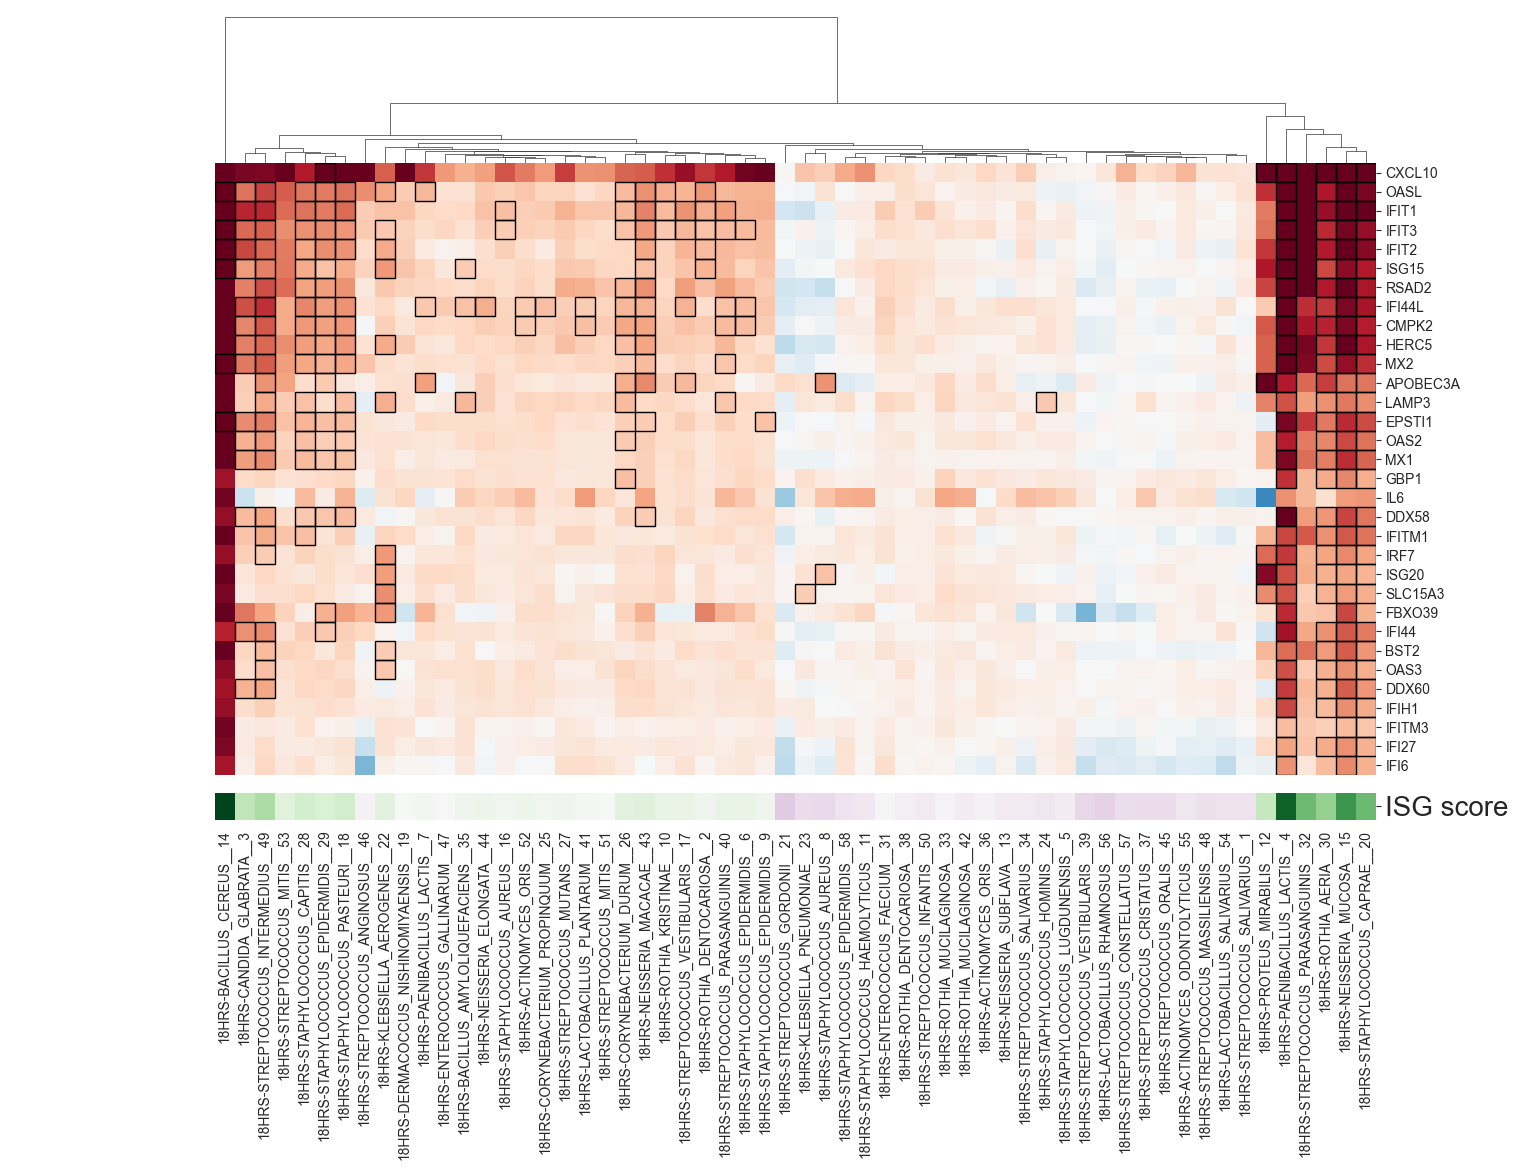

In [9]:
## Clustermap with ISG score
df = df_topic_nzr2.copy() ## Could use df_topic_OK_filtered_r instead
df_sig = df_topic_nzr2_sig.copy() ## Could use df_topic_OK_filtered_sig_r instead
sns.set_context()
sns.set_style("dark")
fig_clu_sig = sns.clustermap(df,
    cmap="RdBu_r",
    dendrogram_ratio=(.15, .20),
    #cbar=False,
    vmin=low,
    vmax=high,
    figsize=(15,9),
    yticklabels=1,
    xticklabels=False,
    row_cluster=False,
    )
ax = fig_clu_sig.ax_heatmap
ax.set_ylabel("")
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
##Add DEG boxes
from matplotlib.patches import Rectangle
###Get clustered lists
#clustered_xlabels = ax.get_xticklabels()
##From the xlabels above
clustered_xlist = [str(i).split(" '")[1][:-2] for i in clustered_xlabels]
clustered_ylabels = ax.get_yticklabels()
clustered_ylist = [str(i).split(" '")[1][:-2] for i in clustered_ylabels]
###Draw on clustermap
df_sig_clu = df_sig[clustered_xlist]
for x in clustered_xlist:
    index=0
    index_x=clustered_xlist.index(x)
    for y in clustered_ylist:
        index_y=clustered_ylist.index(y)
        if df_sig.loc[y,x] == 1:
            ax.add_patch(Rectangle((index_x, index_y), 1, 1, fill=False, edgecolor='black', lw=1))
        elif df_sig.loc[y,x] == -1:
            ax.add_patch(Rectangle((index_x, index_y), 1, 1, fill=False, edgecolor='black', lw=1))
fig_clu_sig.cax.set_visible(False)

import matplotlib.gridspec
fig_clu_sig.gs.update(top=0.95, bottom=0.10)

#create new gridspec for the right part
gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.1464, top=0.08, bottom=0.05)
# create axes within this new gridspec
ax2 = fig_clu_sig.fig.add_subplot(gs2[0])
# plot boxplot in the new axes
fig_innate_1 = sns.heatmap(df_median.T,
    ax=ax2,
    #cmap="PiYG_r",
    cmap="PRGn",
    #cmap="BrBG",
    vmin=-2.5,vmax=3.5,
    center=0.5,
    cbar = False,
    #square=True,
    yticklabels=True,
    xticklabels=True)
ax2.yaxis.tick_right()
plt.setp(ax2.yaxis.get_majorticklabels(), size=20, rotation=0)
plt.show()
fig_path = "exp_figures_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_filtered_clustered_significance_refined_with_ISG_score.pdf"
fig_clu_sig.savefig(fig_path, bbox_inches="tight")

In [10]:
#3. Visualization ISG score
##Order by clustering results
df_topic_nzr3 = df_topic_nzr2[clustered_xlist]
df_topic_nzr3_sig = df_topic_nzr2_sig[clustered_xlist]
##Save to csv
path = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_nzr3.csv"
df_topic_nzr3.to_csv(path, sep=",")
path = "stats_story/"+"H2O_"+prefix_species+"_exp_"+topic+"_nzr3_sig.csv"
df_topic_nzr3_sig.to_csv(path, sep=",")
##Get scores
df_work = df_topic_nzr3.copy()
df_work_sig = df_topic_nzr3_sig.copy()
median_microbe = df_work.median(axis=0).tolist()
sig_counts = df_work_sig.sum(axis=0).tolist()
## Create dataframe
df_microbe_sum = pd.DataFrame()
name_list = df_work.columns.values.tolist()
df_microbe_sum["sample"] = name_list
genus_list = [i.split("-")[1].split("_")[0].capitalize() for i in name_list]
species_list = [i.split("-")[1].split("__")[0].capitalize().replace("_", " ") for i in name_list]
strain_list = [i.split("-")[1].capitalize().replace("_", " ") for i in name_list]
df_microbe_sum["genus"] = genus_list
df_microbe_sum["species"] = species_list
df_microbe_sum["strain"] = strain_list
df_microbe_sum["median_Log2FC"] = median_microbe
df_microbe_sum["sig_counts"] = sig_counts
df_microbe_sum["cluster"] = ["Stimulator"]*28 + ["Non-stimulator"]*24 + ["Stimulator"]*6
## Reorder by species
df_microbe_sum.sort_values("species", inplace=True)
## Save to csv
path = "stats_summary/"+prefix_species+"_"+topic+"_summary.csv"
df_microbe_sum.to_csv(path, sep=",")

/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yangr/miniconda3/envs/py3/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the ma

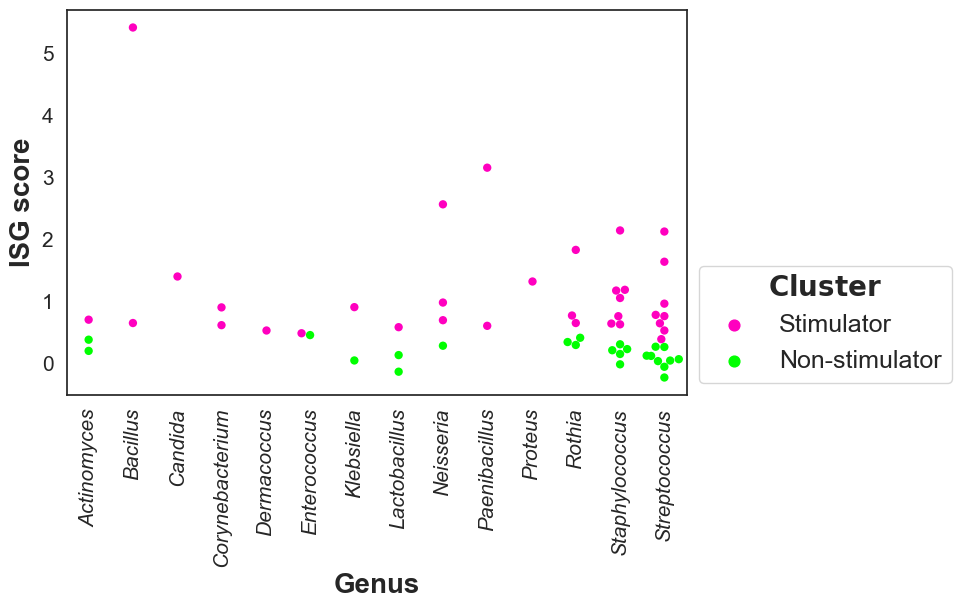

In [11]:
## Dotplot visualization of ISG score -- by genus
topicr = "Interferon stimulated genes"
df_work = df_microbe_sum.copy()
#thres1 = 0.85
#thres2 = 2.5
## Visualization
sns.set(style="white")
sns.set_context({"figure.figsize":(8,5)})
ax = sns.swarmplot(data=df_work,
                   x="genus",
                   y="median_Log2FC",
                   hue="cluster",
                   hue_order = ["Stimulator", "Non-stimulator"],
                   palette = {"Stimulator": "#ff00bf", "Non-stimulator": "#00ff00"},
                   size=6)
## customize
ax.legend(loc="lower left", bbox_to_anchor=(1, 0),
          title="$\\bf{Cluster}$",
          fontsize=18, title_fontsize=20)
plt.ylabel("ISG score", fontsize=20, fontweight="bold")
plt.xlabel("Genus", fontsize=20, fontweight="bold")
#plt.title(topicr, size=25, fontweight="bold")
## add a horizontal line
#ax.axhline(thres1, linewidth=1, color="black", linestyle="dashed")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15, style="italic")
ax.tick_params(axis='y', labelsize=15)
fig_path = "exp_figures_genes/"+species+"_"+topic+"_"+"categorized_microbe_genus.pdf"
plt.savefig(fig_path, bbox_inches="tight")